### Ch17 Figure2

In [2]:
# As it turns out the manager was right. There was very strong evidence that this credit card was used mostly for larger purchases.

data = []

payment_methods = ['credit card', 'check', 'cash', 'paypal']

for i in range(1000):
    payment_metnod = payment_methods[0]
    if rd.random() <= .6:
        total_spend = rd.randint(100,200) + np.round(rd.random(),2)
        if rd.random() <= .95:
            payment_metnod = payment_methods[0]
        else:
            payment_metnod = payment_methods[rd.randint(1, 3)]
    else:
        total_spend = rd.randint(20,150) + np.round(rd.random(),2)
        if rd.random() <= .2:
            payment_method = payment_methods[rd.choice([2,3])]
        elif rd.random() <= .05:
            payment_method = payment_methods[1]
        else:
            payment_method = payment_methods[0]
    
    data.append([i, total_spend, payment_method])

df = pd.DataFrame(data, columns=['id', 'total-spend', 'payment-method'])
# df.to_csv('csv_output/ch17_fig2.csv', index=False)
df = pd.read_csv('csv_output/ch17_fig2.csv')
df.head()

,id,total-spend,payment-method
0,0,134.05,credit card
1,1,149.24,credit card
2,2,175.54,credit card
3,3,100.93,credit card
4,4,148.32,credit card


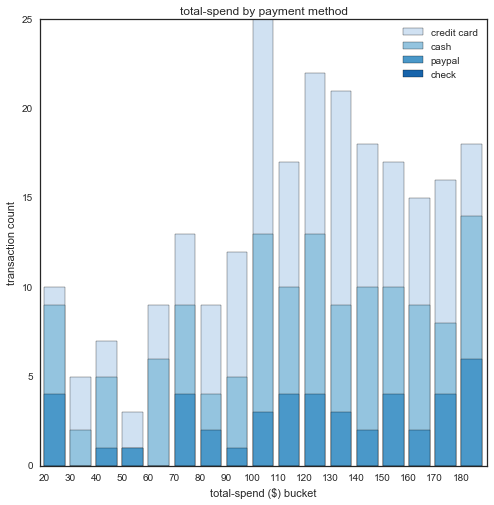

In [3]:
df = pd.read_csv('csv_output/ch17_fig2.csv')
payment_methods = ['credit card', 'cash', 'paypal', 'check']

%matplotlib inline
sns.set_style("white")
cm = sns.color_palette('Blues', 4)

f, ax = plt.subplots(1,1, figsize=(8,8))
dgb = df.groupby('payment-method')['total-spend'].agg(['mean', 'count'])

i = 0
new = True
total = np.histogram(df['total-spend'], bins=np.arange(20,200,10))[0]
for x in payment_methods:
    
    if new:
        new = False
        series = total - np.histogram(df[df['payment-method'] == x]['total-spend'], bins=np.arange(20,200,10))[0]
    else:
        series -= np.histogram(df[df['payment-method'] == x]['total-spend'], bins=np.arange(20,200,10))[0]
    ax.bar(left= np.arange(17), height=series, color=cm[i])
    i += 1

ax.legend(payment_methods)
ax.set_title('total-spend by payment method');
ax.set_xticks(np.arange(17))
ax.set_xticklabels(np.arange(20,200,10))
ax.set_xlim(-.15,17)
ax.set_xlabel('total-spend ($) bucket')
ax.set_ylabel('transaction count')
    
f.savefig('svg_output/ch17_fig2.svg', format='svg')

Looking at the count for each transaction value bucket, as the total amount trending higher, more transactions are paid by credit card, the second category is cash.